In [1]:
#import statements
import pandas as pd 
import numpy as np 
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

### Initial Exploratory Data Analyses    
We will analyze the Philadelphia Housing dataset.   
This dataset is a subset of the original dataset found on the City of Philadelphia's website.   
The following exploratory analysis uses the following columns:      
'basements',
 'category_code_description',
 'census_tract',
 'central_air',
 'depth',
 'exterior_condition',
 'fireplaces',
 'frontage',
 'garage_spaces',
 'geographic_ward',
 'interior_condition',
 'market_value',
 'number_of_bathrooms',
 'number_of_bedrooms',
 'number_of_rooms',
 'number_stories',
 'recording_date',
 'sale_date',
 'sale_price',
 'topography',
 'total_area',
 'total_livable_area',
 'type_heater',
 'view_type',
 'year_built',
 'zip_code',
 'lat',
 'lng'

In [3]:
#read in the pickled dataset from the processing script:
infile = open("../processing/housedat.pickle",'rb')
dat = pickle.load(infile)
infile.close()

First, analyze the outcome of interest: **Sale Price**   

In [78]:
dat['sale_price'].describe()

count    5.044890e+05
mean     3.047132e+05
std      1.168687e+07
min      0.000000e+00
25%      1.000000e+00
50%      5.000000e+04
75%      1.500000e+05
max      9.487291e+08
Name: sale_price, dtype: float64

In [77]:
100 * (dat['sale_price'].eq(0).sum()/dat.shape[0] )

0.15698711595639245

*Note*: 0.15% of the data has a sale_price of $0.

The outcome, 'Sale Price" is extremely right skewed.  
We see this from the below histogram:   

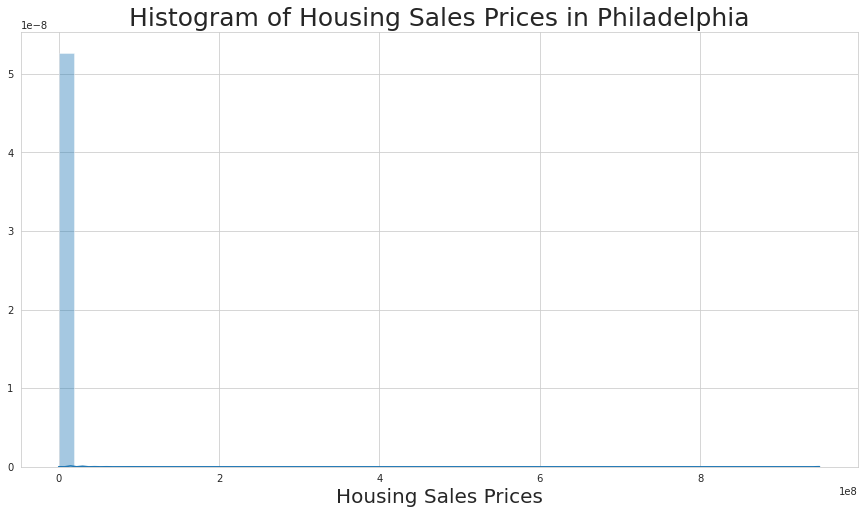

In [71]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.distplot(dat['sale_price'])
plt.title("Histogram of Housing Sales Prices in Philadelphia", fontsize=25)
plt.xlabel("Housing Sales Prices", fontsize=20)
plt.show()

The overall histogram is not very useful, so we sample a random 1000 rows from the data and then re-plot the histogram below.    The resulting histogram is a little more informative and shows that the data is still very right skewed.   
We can see some bins between the tail of the distribution and values at the lower end of the distribution.   

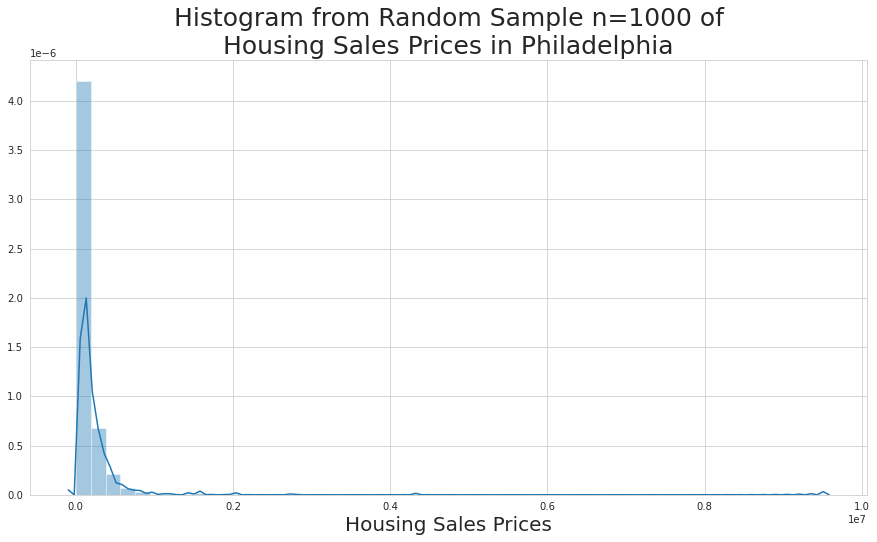

In [72]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.distplot(dat['sale_price'].sample(1000, random_state=50))
plt.title("Histogram from Random Sample n=1000 of\nHousing Sales Prices in Philadelphia", fontsize=25)
plt.xlabel("Housing Sales Prices", fontsize=20)
plt.show()

Plot the location of the data and shade points by the Housing Sales Price

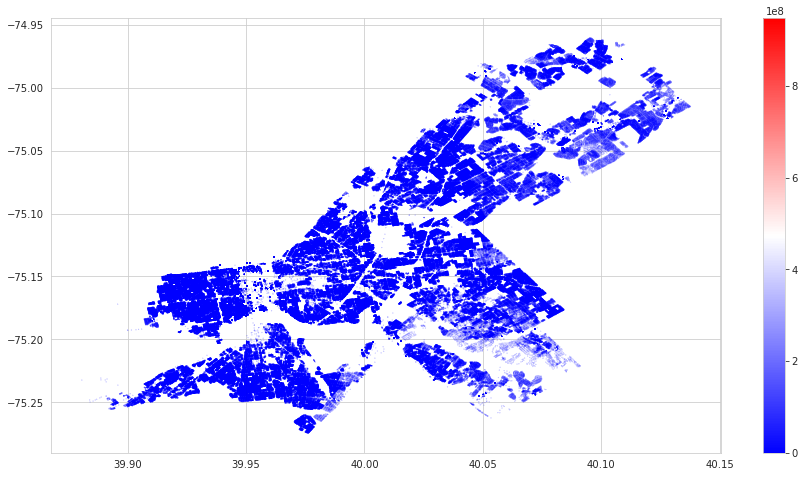

In [95]:
plt.figure(figsize=(15,8))
plt.scatter(x=dat['lng'], y=dat['lat'],
           s=0.01, c = dat['sale_price'],
            cmap="bwr")
plt.colorbar()
plt.show()